# Mandelbrot Set

The Mandelbrot set is connected to complex dynamics and chaos theory. It embodies the
concepts of chaotic systems: self-similarity, infinite complexity, and sensitive dependence on
initial conditions. The Mandelbrot set exists in the complex plane where a complex number
c is composed of a real part along the x-axis and an imaginary part along the y-axis. To
derive the Mandelbrot set, the follow prescription is used with $ z_{0} = 0$:

$$ z_{n+1} = z^{2}_{n} + c $$

where $c$ is a complex number of the form 
$$ c = a + ib $$ 
with $a$ as the real part and $b$ is the
imaginary part. 

At any c, we can observe stability of the point by
using the prescription. It is accepted by mathematicians that once $z_{n+1} > 2$, it will never
converge. Therefore, that $c$ value is said to be unstable. But, we care about how long it took
for the point to become unstable, the n value.
I used the prescription above to perform iterations on each point in the space
defined. I defined instability to be when $z_{n+1} \ge 2$. The color map shows how many iterations it took for a point to become unstable. So, the distinct dark regions are called stable; in 100 iterations, they converged to some number. The wide range of colors outside of this tell how stable other points are. A point that took 80 iterations to diverge is more stable than a point that diverges in 2 iterations.

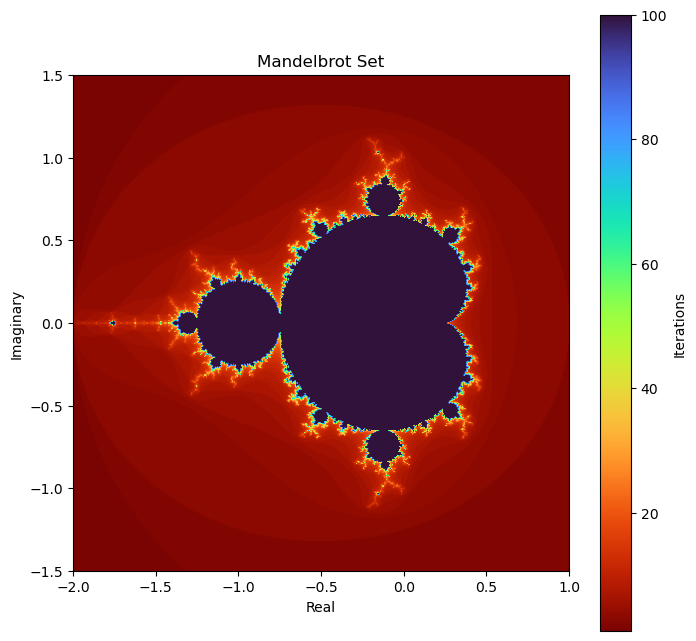

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mandelbrot(c, max_iter):
    """
    Compute the Mandelbrot iteration for a given complex number c.
    
    Parameters:
        c (complex): Complex number for which to compute the Mandelbrot iteration.
        max_iter (int): Maximum number of iterations.
    
    Returns:
        int: Number of iterations required to cross the threshold.
    """
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    """
    Generate the Mandelbrot set.
    
    Parameters:
        xmin (float): Minimum value of the real part of c.
        xmax (float): Maximum value of the real part of c.
        ymin (float): Minimum value of the imaginary part of c.
        ymax (float): Maximum value of the imaginary part of c.
        width (int): Width of the image.
        height (int): Height of the image.
        max_iter (int): Maximum number of iterations for the Mandelbrot computation.
    
    Returns:
        numpy.ndarray: Array representing the Mandelbrot set.
    """
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width))
    for i in range(width):
        for j in range(height):
            mandelbrot_set[j,i] = mandelbrot(x[i] + 1j*y[j], max_iter)
    return mandelbrot_set

# Set the range and dimensions of the Mandelbrot set
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
width, height = 500, 500

# Set the maximum number of iterations
max_iter = 100

# Generate the Mandelbrot set
mandelbrot_image = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Display the Mandelbrot set
plt.figure(figsize=(8, 8))
cmap = plt.cm.turbo
cmap2 = cmap.reversed()
plt.imshow(mandelbrot_image, extent=(xmin, xmax, ymin, ymax), cmap=cmap2, origin='lower')
plt.colorbar(label='Iterations')
plt.title('Mandelbrot Set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.savefig(f"Mandelbrot2.png", format='png')
plt.show()


## Self-Similarity

Zooming in on the Mandelbrot Set to find another Mandelbrot Set!

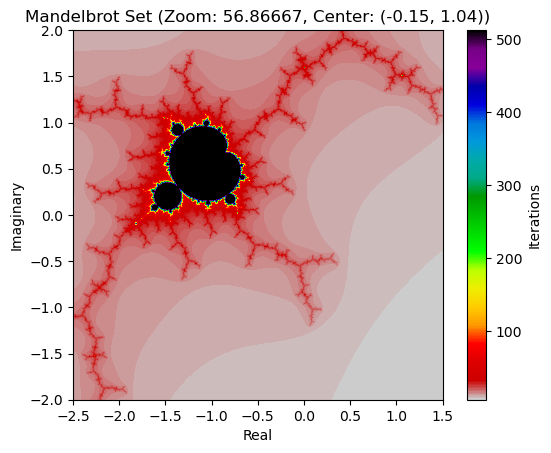

In [7]:
import matplotlib.pyplot as plt
import numpy as np

px, py, zoom = -0.15, 1.04, 5.686667e+1
R = 3 
max_iteration = 512
w, h = 1250, 1250
mfactor = 1

def Mandelbrot(x, y, max_iteration, minx, maxx, miny, maxy):
    zx = 0
    zy = 0
    RX1, RX2, RY1, RY2 = px - R / 2, px + R / 2, py - R / 2, py + R / 2
    cx = (x - minx) / (maxx - minx) * (RX2 - RX1) + RX1
    cy = (y - miny) / (maxy - miny) * (RY2 - RY1) + RY1
    i = 0
    while zx ** 2 + zy ** 2 <= 4 and i < max_iteration:
        temp = zx ** 2 - zy ** 2
        zy = 2 * zx * zy + cy
        zx = temp + cx
        i += 1
    return i

def gen_Mandelbrot_image():
    # Create an empty array to store the mandelbrot set data
    mandelbrot_set = np.zeros((h, w))

    # Calculate the mandelbrot set for each pixel
    for x in range(w):
        for y in range(h):
            mandelbrot_set[y, x] = Mandelbrot(x, y, max_iteration, 0, w - 1, 0, h - 1)

    # Normalize the mandelbrot set data
    mandelbrot_set_normalized = mandelbrot_set #** mfactor / max_iteration ** mfactor

    # Generate the plot using matplotlib's imshow function and applying a colormap
    cmap = plt.cm.nipy_spectral
    cmap2 = cmap.reversed()
    plt.imshow(mandelbrot_set_normalized, cmap=cmap2, aspect='equal', extent=(-2.5, 1.5, -2, 2))
    #plt.colorbar()  # Add colorbar
    plt.colorbar(label='Iterations')
    plt.title(f"Mandelbrot Set (Zoom: {zoom}, Center: ({px}, {py}))")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.savefig(f"mandel_julia2.png", format='png')
    plt.show()

R = 3 / zoom
gen_Mandelbrot_image()


## Animation

In [ ]:
plt.rcParams['animation.embed_limit'] = 500

# Define parameters for zoom animation
frames = 250
zoom_factor = 1.06

# Create an animation that zooms into different regions of the Mandelbrot set
fig, ax = plt.subplots()

def update(frame):
    zoom = (xmax - xmin) / (zoom_factor**frame)
    x_center = -0.86005
    y_center = 0.265
    xmin_new = x_center - zoom / 2
    xmax_new = x_center + zoom / 2
    ymin_new = y_center - zoom / 2
    ymax_new = y_center + zoom / 2
    mandelbrot_image = mandelbrot_set(xmin_new, xmax_new, ymin_new, ymax_new, width, height, max_iter)
    cmap = plt.cm.turbo
    cmap2 = cmap.reversed()
    ax.imshow(mandelbrot_image, extent=(xmin_new, xmax_new, ymin_new, ymax_new), cmap=cmap2, origin='lower')
    ax.set_title(f'Mandelbrot Set Frame {frame+1}/{frames}')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')

ani = FuncAnimation(fig, update, frames=frames, interval=120)

# Display the animation as HTML
html = ani.to_jshtml()

# Save the HTML animation to a file
with open("mandelbrot_zoom_animation.html", "w") as f:
    f.write(html)


## Julia Set

For each $c$ in the complex plane, there is a set of stable and unstable outcomes for the Mandelbrot Set prescription. Each set is called a Julia set. So, we can think of the Mandelbrot set as a map of all Julia sets because it uses a different $c$ at each location, as if transforming from one
Julia set to another across space.

Another Julia Set equation: $ c = −0.79 + 0.15i $

C:\Users\ndepe\AppData\Local\Temp\ipykernel_13444\2003578960.py:27: RuntimeWarning: overflow encountered in multiply
  Z = Z*Z + c
C:\Users\ndepe\AppData\Local\Temp\ipykernel_13444\2003578960.py:27: RuntimeWarning: invalid value encountered in multiply
  Z = Z*Z + c


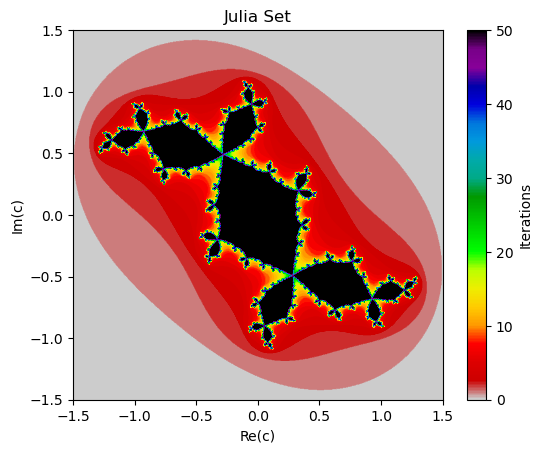

<Figure size 640x480 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def julia_set(c, width, height, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5), max_iter=50, threshold=2):
    """
    Generate Julia set for the given complex number c.

    Parameters:
        c (complex): Complex number.
        width (int): Width of the image.
        height (int): Height of the image.
        xlim (tuple): X-axis limits.
        ylim (tuple): Y-axis limits.
        max_iter (int): Maximum number of iterations to perform.
        threshold (float): Threshold to determine if a point is in the Julia set.

    Returns:
        numpy.ndarray: 2D array representing the Julia set.
    """
    x = np.linspace(xlim[0], xlim[1], width)
    y = np.linspace(ylim[0], ylim[1], height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    julia_set = np.zeros(Z.shape, dtype=int)

    for i in range(max_iter):
        Z = Z*Z + c
        mask = np.abs(Z) <= threshold
        julia_set += mask
        if not mask.any():
            break

    return julia_set

def plot_julia_set(julia_set):
    """
    Plot the Julia set.

    Parameters:
        julia_set (numpy.ndarray): 2D array representing the Julia set.
    """
    cmap = plt.cm.nipy_spectral
    cmap2 = cmap.reversed()
    plt.imshow(julia_set, cmap=cmap2, extent=[-1.5, 1.5, -1.5, 1.5])
    plt.colorbar(label='Iterations')
    plt.title('Julia Set')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.show()

# Define the complex number c
c = -0.12 - 0.77j

# Generate and plot the Julia set
julia_set_data = julia_set(c, 800, 800)
plot_julia_set(julia_set_data)
plt.savefig('julia3.png')